<a href="https://colab.research.google.com/github/PrathamKumar125/Computer-Vision/blob/master/CV6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6. write a program for High Dynamic Range (HDR) Imaging**


Basic Idea:

1.   The dynamic range of images is limited to 8-bits (0 - 255) per channel

2.   Very bright pixels saturate to 255

3.  Very dark pixels clip to 0

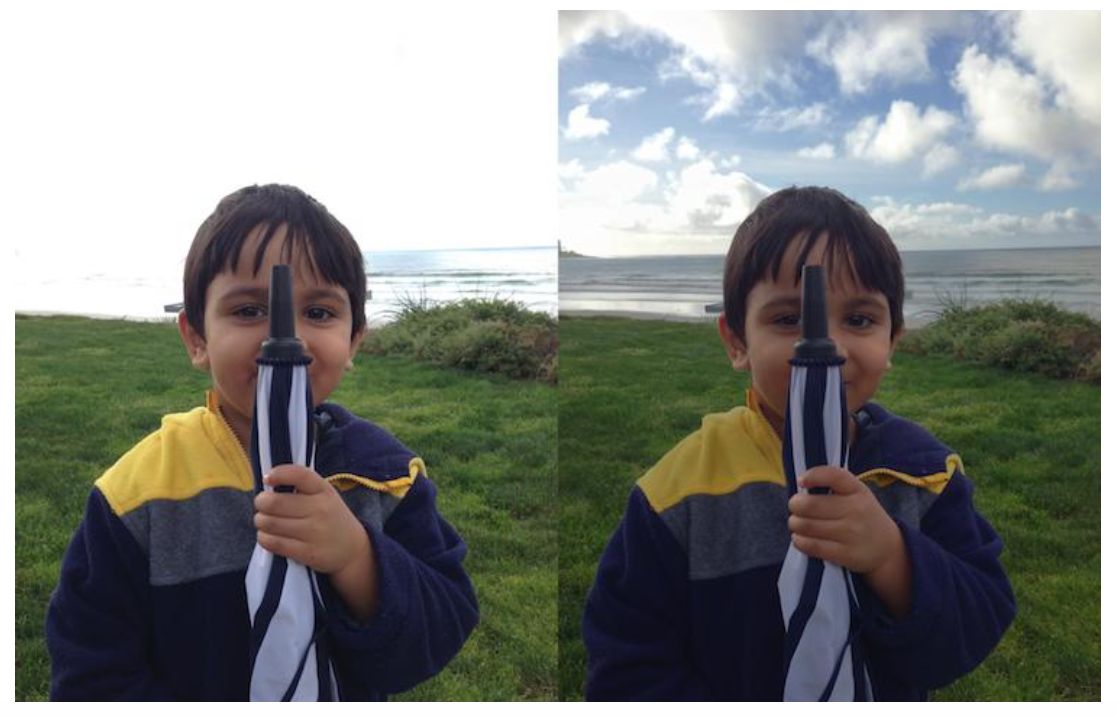

In [ ]:
from PIL import Image
Image.open("/content/drive/MyDrive/CV_Datasets/hdr/hdr_1.PNG")

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
filenames=["img_0.033.jpg",
           "img_0.25.jpg",
           "img_2.5.jpg",
           "img_15.jpg"
           ]
path="/content/drive/MyDrive/CV_Datasets/hdr/"

In [ ]:
times = np.array([1 / 30.0, 0.25, 2.5, 15.0], dtype=np.float32)

In [ ]:
images=[]
for filename in filenames:
    im=cv2.imread(os.path.join(path,filename))
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    images.append(im)
print(len(images))

4


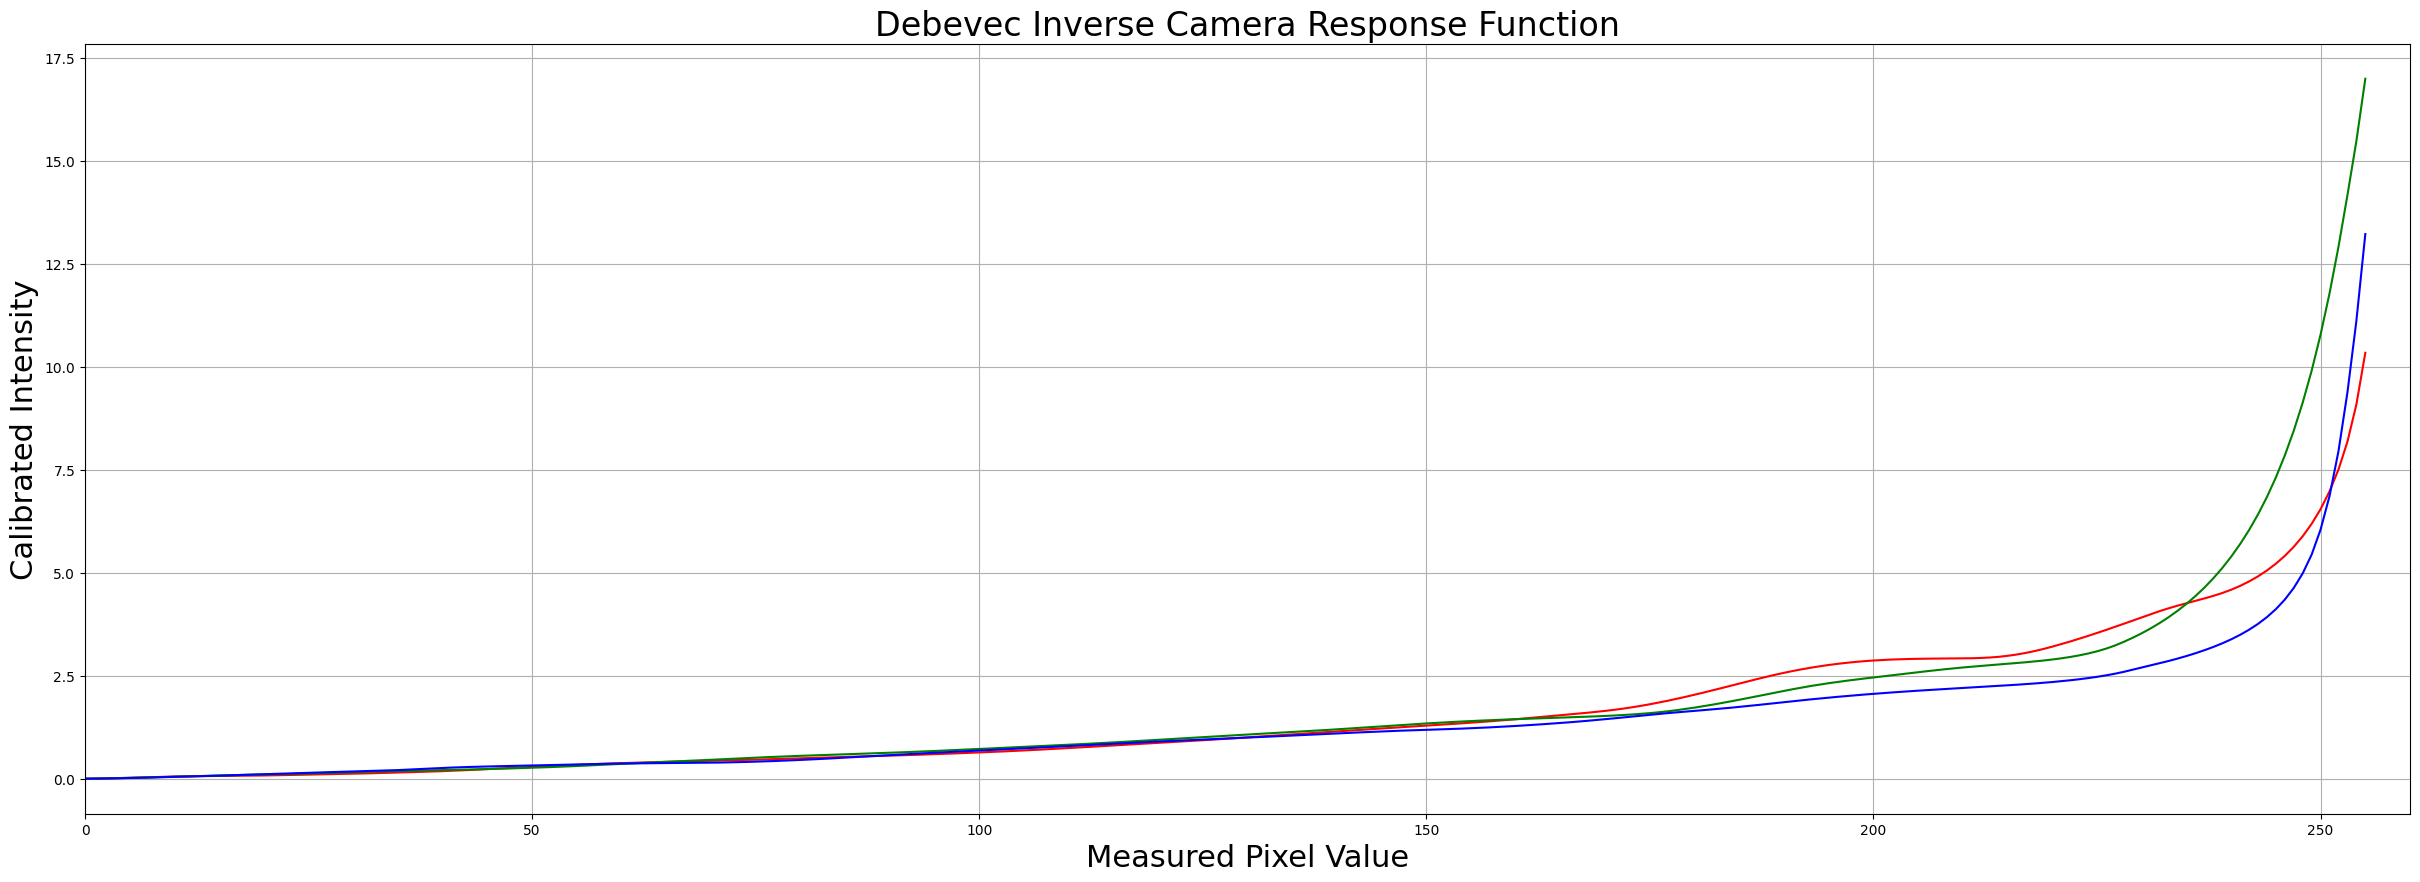

In [ ]:
# Align Images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)
# Find Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)
# Plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)
ax = plt.figure(figsize=(30, 10))
plt.title("Debevec Inverse Camera Response Function", fontsize=24)
plt.xlabel("Measured Pixel Value", fontsize=22)
plt.ylabel("Calibrated Intensity", fontsize=22)
plt.xlim([0, 260])
plt.grid()
plt.plot(x, y[:, 0], "r", x, y[:, 1], "g", x, y[:, 2], "b")

saved ldr-Drago.jpg


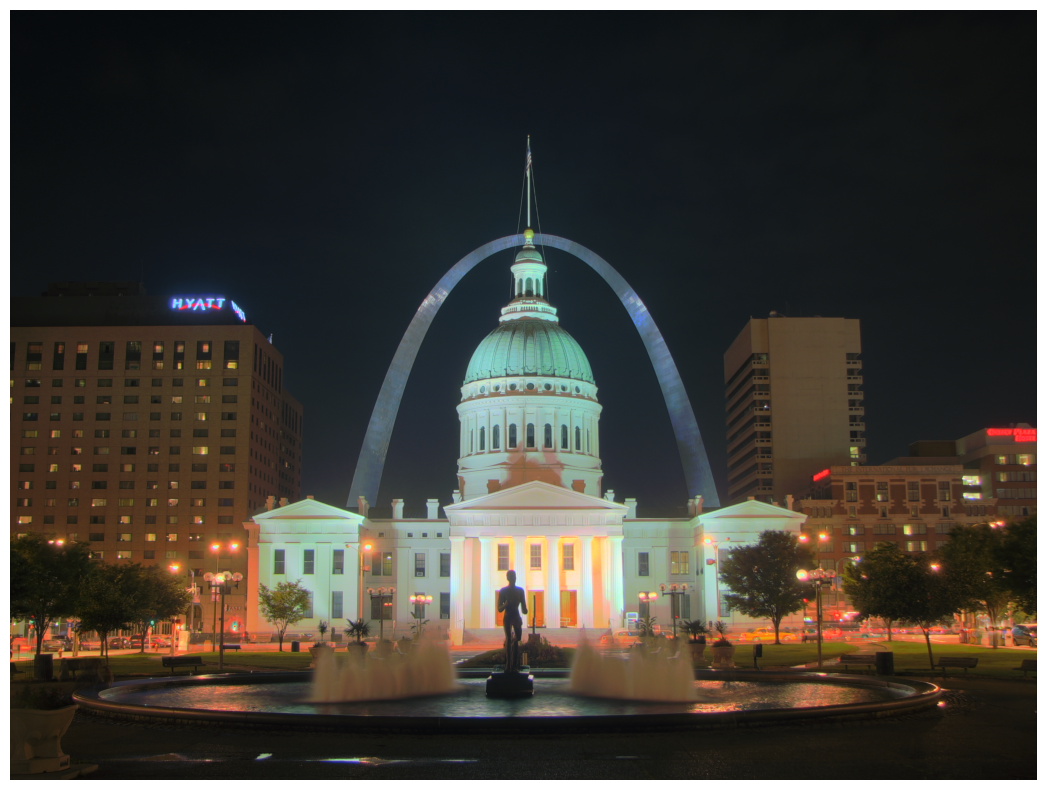

In [ ]:
# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrDrago, 0, 1));plt.axis("off")
cv2.imwrite(os.path.join(path,"ldr-Drago.jpg"), ldrDrago * 255)
print("saved ldr-Drago.jpg")

Tonemaping using Reinhard's method ... 
saved ldr-Reinhard.jpg


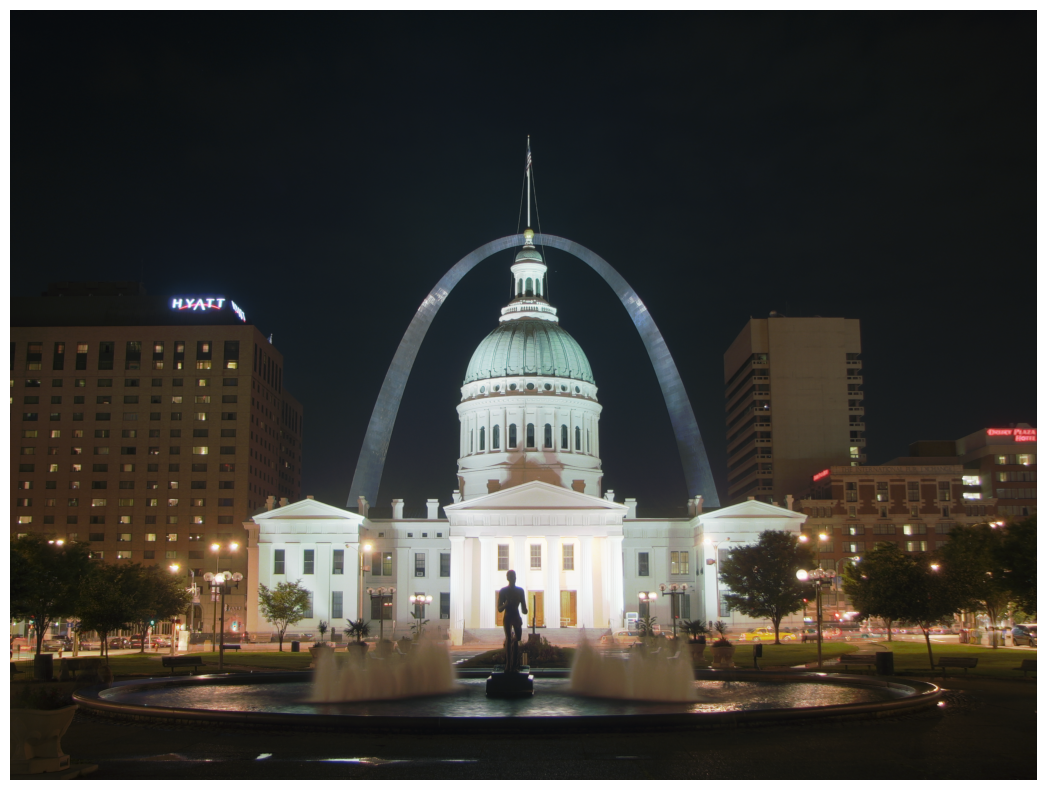

In [ ]:
# Tonemap using Reinhard's method to obtain 24-bit color image
print("Tonemaping using Reinhard's method ... ")
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0, 0, 0)
ldrReinhard = tonemapReinhard.process(hdrDebevec)
plt.figure(figsize=(20, 10));plt.imshow(np.clip(ldrReinhard, 0, 1));plt.axis("off")
cv2.imwrite(os.path.join(path,"ldr-Reinhard.jpg"), ldrReinhard * 255)
print("saved ldr-Reinhard.jpg")